In [291]:
#Import essential libraries
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import json
import time
import math
import re
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [292]:
##Data Gathering

In [11]:
# Twitter archive data
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df .head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [34]:
# Image predictions data programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
   file.write(response.content)    
image_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
# Twitter API data for retweet & fav counts # Declare Twitter API keys and access tokens

consumer_key = 'XXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
#Extract based in tweet id 
extract_tweet=api.get_status(archive.tweet_id[210],tweet_mode='extended')
content=extract_tweet._json
content

In [ ]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

In [ ]:
#trial2 to get data another way from discourse 
extract_tweet.full_text

In [ ]:
#trial3 to get data another way from discourse 
extract_tweet.retweet_count,extract_tweet.id,extract_tweet.favorite_count

In [ ]:
#test key of specific tweet
content.keys()

In [ ]:
#check retweet & fav counts
content['retweet_count'],content['id'],content['favorite_count']

In [ ]:
#check user info
content['user'].keys()

In [ ]:
#additional info
content['user']['followers_count'],content['user']['location']

In [ ]:
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [159]:
#Note to save time initially i didn't run above code just Accessing Project Data Without a Twitter Account however previous section was for inisghts to rerun it later  after project submission to learn more
# Read tweet's JSON data line by line
tweets=[]
with open('tweet-json.txt','r') as file:
    for line in file:
        tweet=json.loads(line)
        tweets.append(tweet)
        
tweets[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [160]:
type(tweets[0])

dict

In [163]:
#Reading JSON content as df
tweets_df = pd.read_json('tweet-json.txt', lines = True,encoding='utf-8')

In [165]:
tweets_df.head ()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [26]:
# Convert to a DataFrame
api_df = pd.DataFrame()

# Create a DataFrame with tweet ID, retweet count, favorite count 
api_df['id']=list(map(lambda tweet: tweet['id'],tweets))
api_df['retweet_count']=list(map(lambda tweet: tweet['retweet_count'],tweets))
api_df['favorite_count']=list(map(lambda tweet: tweet['favorite_count'],tweets))
api_df['followers_count']=list(map(lambda tweet: tweet['user']['followers_count'],tweets))

In [ ]:
##Assess Data 

In [27]:
#Display data caprured from data frame 
api_df.head()

,id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [28]:
#Sample from tweet achive data frame
archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2035,671735591348891648,NaN,NaN,2015-12-01 17:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He's ready for Christmas. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671735591...,11,10,Oscar,None,None,None,None
1203,716285507865542656,NaN,NaN,2016-04-02 15:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephanus. She stays woke. 12/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716285507...,12,10,Stephanus,None,None,None,None
1122,730573383004487680,NaN,NaN,2016-05-12 01:40:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rooney. He can't comprehend glass. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730573383...,10,10,Rooney,None,None,pupper,None
1141,727644517743104000,NaN,NaN,2016-05-03 23:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo struggling to cope with the win...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727644517...,13,10,None,doggo,None,None,None
1258,710283270106132480,NaN,NaN,2016-03-17 01:55:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gunner. He's a Figamus Newton. King of...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710283270...,11,10,Gunner,None,None,None,None
1639,684177701129875456,NaN,NaN,2016-01-05 01:00:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kulet. She's very proud of the flower ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684177701...,10,10,Kulet,None,None,None,None
1655,683391852557561860,NaN,NaN,2016-01-02 20:58:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Jack (pronounced ""Kevin""). He's a...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/683391852...,11,10,Jack,None,None,None,None
1905,674606911342424069,6.744689e+17,4.196984e+09,2015-12-09 15:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The 13/10 also takes into account this impecca...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
202,853639147608842240,NaN,NaN,2017-04-16 16:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",A photographer took pictures before and after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/853639147...,13,10,None,None,None,None,None
561,802624713319034886,NaN,NaN,2016-11-26 21:26:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Yep... just as I suspected. Yo...",7.776842e+17,4.196984e+09,2016-09-19 01:42:24 +0000,https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,None,None


In [29]:
#tweet achive metadata
archive_df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [30]:
# Check retweets in archive_df 
len(archive_df[archive_df.retweeted_status_id.isnull() == False])

181

In [39]:
# Sort by rating_numerator
archive_df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [38]:
# Sort by rating_denominator 
archive_df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [42]:
archive_df.name.value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: name, Length: 957, dtype: int64

In [41]:
archive_df.name.value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: name, Length: 957, dtype: int64

In [44]:
# Capturing dog tagging for doggo and floofer at the same time 
len(archive_df[(archive_df.doggo != 'None') & (archive_df.floofer != 'None')])

1

In [45]:
# Capturing dog tagging for doggo and pupper at the same time 
len(archive_df[(archive_df.doggo != 'None') & (archive_df.pupper != 'None')])

12

In [46]:
# Capturing dog tagging for doggo and puppo at the same time
len(archive_df[(archive_df.doggo != 'None') & (archive_df.puppo != 'None')])

1

In [47]:
# Capturing dog tagging for floofer and pupper at the same time 
len(archive_df[(archive_df.floofer != 'None') & (archive_df.pupper != 'None')])

0

In [48]:
# Capturing dog tagging for floofer and puppo at the same time 
len(archive_df[(archive_df.floofer != 'None') & (archive_df.puppo != 'None')])

0

In [49]:
# Capturing dog tagging for pupper and puppo columns are not None
len(archive_df[(archive_df.pupper != 'None') & (archive_df.puppo != 'None')])

0

In [51]:
# validate tweet_id
len(archive_df[archive_df.tweet_id.isnull() == True])

0

In [52]:
# validate in_reply_to_status_id
len(archive_df[archive_df.in_reply_to_status_id.isnull() == True])

2278

In [53]:
# validate in_reply_to_user_id 
len(archive_df[archive_df.in_reply_to_user_id.isnull() == True])

2278

In [54]:
# validate timestamp 
len(archive_df[archive_df.timestamp.isnull() == True])

0

In [55]:
# validate source 
len(archive_df[archive_df.source.isnull() == True])

0

In [56]:
# validate text 
len(archive_df[archive_df.text.isnull() == True])

0

In [57]:
# validate retweeted_status_id 
len(archive_df[archive_df.retweeted_status_id.isnull() == True])

2175

In [58]:
# validate retweeted_status_user_id 
len(archive_df[archive_df.retweeted_status_user_id.isnull() == True])

2175

In [59]:
# validate retweeted_status_timestamp 
len(archive_df[archive_df.retweeted_status_timestamp.isnull() == True])

2175

In [60]:
# validate expanded_urls 
len(archive_df[archive_df.expanded_urls.isnull() == True])

59

In [61]:
# validate rating_numerator 
len(archive_df[archive_df.rating_numerator.isnull() == True])

0

In [62]:
# validate rating_denominator 
len(archive_df[archive_df.rating_denominator.isnull() == True])

0

In [63]:
# validate name 
len(archive_df[archive_df.name.isnull() == True])

0

In [65]:
# validate doggo 
len(archive_df[archive_df.doggo.isnull() == True])

0

In [66]:
# validate floofer 
len(archive_df[archive_df.floofer.isnull() == True])

0

In [67]:
# validate pupper 
len(archive_df[archive_df.pupper.isnull() == True])

0

In [68]:
# validate puppo 
len(archive_df[archive_df.puppo.isnull() == True])

0

In [69]:
# Check tweet_id consistency  between  archive_df and image_df
#archive_df[~archive_df.tweet_id.isin(image_df.tweet_id)]
len(archive_df[~archive_df.tweet_id.isin(image_df.tweet_id)])

281

In [70]:
#Sample from image data frame
image_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1922,856543823941562368,https://pbs.twimg.com/media/C-MOEDCXYAEjp7o.jpg,1,Boston_bull,0.306910,True,Siamese_cat,0.191218,False,Chihuahua,0.189288,True
1008,709207347839836162,https://pbs.twimg.com/media/CdecUSzUIAAHCvg.jpg,1,Chihuahua,0.948323,True,Italian_greyhound,0.017730,True,quilt,0.016688,False
1144,730211855403241472,https://pbs.twimg.com/media/CiI7zVZUoAEzGW7.jpg,1,pug,0.341663,True,Norwegian_elkhound,0.171222,True,German_shepherd,0.124687,True
1593,798694562394996736,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,1,Chihuahua,0.615163,True,Pembroke,0.159509,True,basenji,0.084466,True
376,673148804208660480,https://pbs.twimg.com/media/CVeBQwiUsAAqhLw.jpg,1,tub,0.873010,False,bathtub,0.091434,False,toilet_seat,0.025456,False
1517,787322443945877504,https://pbs.twimg.com/media/Cu0hlfwWYAEdnXO.jpg,1,seat_belt,0.747739,False,golden_retriever,0.105703,True,dingo,0.017257,False
1782,828770345708580865,https://pbs.twimg.com/media/C4BiOXOXAAAf6IS.jpg,1,seat_belt,0.765979,False,Chesapeake_Bay_retriever,0.033899,True,polecat,0.027252,False
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1644,808106460588765185,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True


In [71]:
#Image metadata
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [72]:
#Display data caprured from data frame 
api_df.sample(10)

,id,retweet_count,favorite_count,followers_count
1947,673689733134946305,700,1855,3201004
682,788412144018661376,5990,16060,3200901
1709,680497766108381184,2162,4639,3200952
1615,685169283572338688,1620,4489,3200950
741,780476555013349377,136,0,3200901
1190,717790033953034240,1272,3170,3200944
401,824325613288833024,11848,12999,3200894
2113,670428280563085312,694,1484,3201009
109,871102520638267392,5764,21461,3200891
678,789137962068021249,3244,10875,3200901


In [74]:
#API metadata
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
id                 2354 non-null int64
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(4)
memory usage: 73.7 KB


In [ ]:
##Clean

In [75]:
# Create a copy of archive data 
archive_clean = archive_df.copy()

In [76]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [ ]:
#Work on 3 Data Quality issues related to datatypes

In [77]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [140]:
#For tidness make sure that all tweets ids in archive clean consistent with image_df
archive_clean = archive_clean[archive_clean.tweet_id.isin(img_df.tweet_id)]

In [ ]:
#Discrading 3 fields that will not lead to solid analysis as a results of lot's of missing values

In [78]:
#Dropping retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp from metadata 
archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [79]:
#confirm dropping retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp from metadata 
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 257.8+ KB


ValueError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
#Work on 3 Data Quality issues related to datatypes

In [82]:
#Fill missing data to allow chaning metadata for reply_to_status_id & in_reply_to_user_id
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.fillna(0)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.fillna(0)

In [84]:
#Change in_reply_to_status_id & in_reply_to_user_id to integer type

archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.astype(np.int64)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype(np.int64)

In [85]:
#Change timestamp to datetime data type

archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

In [86]:
#confirm metadata modifications
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    2356 non-null int64
in_reply_to_user_id      2356 non-null int64
timestamp                2356 non-null datetime64[ns, UTC]
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: datetime64[ns, UTC](1), int64(5), object(8)
memory usage: 257.8+ KB


In [113]:
# Validiate rating_numerator
len(archive_clean[archive_clean['rating_numerator'] == 0 ])

1

In [114]:
# Validiate rating_denominator
len(archive_clean[archive_clean['rating_denominator'] == 0 ])

2

In [115]:
# Exclude zero values from the numertor and denuminator ratings 

archive_clean = archive_clean[archive_clean['rating_numerator'] != 0 ]
archive_clean = archive_clean[archive_clean['rating_denominator'] != 0 ]

In [116]:
# Validiate rating_numerator
len(archive_clean[archive_clean['rating_numerator'] == 0 ])

0

In [117]:
# Validiate rating_denominator
len(archive_clean[archive_clean['rating_denominator'] == 0 ])

0

In [118]:
# Replace the value 'None' with the NaN to show that it is missing values for 4 coulmns doggo,floofer,pupper and puppo

archive_clean =  archive_clean.replace('None', np.nan)

In [119]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0,0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,0,0,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,0,0,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,0,0,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,0,0,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [120]:
#confirm metadata modifications
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2353 non-null int64
in_reply_to_status_id    2353 non-null int64
in_reply_to_user_id      2353 non-null int64
timestamp                2353 non-null datetime64[ns, UTC]
source                   2353 non-null object
text                     2353 non-null object
expanded_urls            2295 non-null object
rating_numerator         2353 non-null int64
rating_denominator       2353 non-null int64
name                     1611 non-null object
doggo                    97 non-null object
floofer                  10 non-null object
pupper                   257 non-null object
puppo                    30 non-null object
dtypes: datetime64[ns, UTC](1), int64(5), object(8)
memory usage: 275.7+ KB


In [121]:
#Discrading additional 4th  field expanded_urls that will not lead to solid analysis currently 
archive_clean.drop(['expanded_urls'], axis=1, inplace=True)

In [122]:
#confirm metadata modifications
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2353 non-null int64
in_reply_to_status_id    2353 non-null int64
in_reply_to_user_id      2353 non-null int64
timestamp                2353 non-null datetime64[ns, UTC]
source                   2353 non-null object
text                     2353 non-null object
rating_numerator         2353 non-null int64
rating_denominator       2353 non-null int64
name                     1611 non-null object
doggo                    97 non-null object
floofer                  10 non-null object
pupper                   257 non-null object
puppo                    30 non-null object
dtypes: datetime64[ns, UTC](1), int64(5), object(7)
memory usage: 257.4+ KB


In [123]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0,0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,0,0,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,0,0,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,0,0,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,0,0,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,NaN,NaN,NaN


In [125]:
#check doggo counts
archive_clean.doggo.value_counts()

doggo    97
Name: doggo, dtype: int64

In [126]:
#check floofer counts
archive_clean.floofer.value_counts()

floofer    10
Name: floofer, dtype: int64

In [127]:
#check pupper counts
archive_clean.pupper.value_counts()

pupper    257
Name: pupper, dtype: int64

In [128]:
#check puppo counts
archive_clean.puppo.value_counts()

puppo    30
Name: puppo, dtype: int64

In [129]:
#As part of tidness will include all dogs classifications doggo,floofer,pupper and puppo to be merged into one column  dog_classification
archive_clean['dog_classification'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [130]:
# Convert the dog_classification datatype to categorical
archive_clean.dog_classification = archive_clean.dog_classification.astype('category')

In [131]:
# Drop the all dogs classifications colmns : doggo, floofer, pupper and puppo 
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [139]:
archive_clean.head(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_classification
0,892420643555336193,0,0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,0,0,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,0,0,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,0,0,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,0,0,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN
5,891087950875897856,0,0,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,NaN,NaN
6,890971913173991426,0,0,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN
7,890729181411237888,0,0,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,NaN,NaN
8,890609185150312448,0,0,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,NaN
9,890240255349198849,0,0,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,NaN


In [134]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                 2353 non-null int64
in_reply_to_status_id    2353 non-null int64
in_reply_to_user_id      2353 non-null int64
timestamp                2353 non-null datetime64[ns, UTC]
source                   2353 non-null object
text                     2353 non-null object
rating_numerator         2353 non-null int64
rating_denominator       2353 non-null int64
name                     1611 non-null object
dog_classification       0 non-null category
dtypes: category(1), datetime64[ns, UTC](1), int64(5), object(3)
memory usage: 186.2+ KB


In [142]:
#Create copy from image_df to cleanup data
image_clean = image_df.copy()

In [143]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [144]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [146]:
#for better tidness will rename 6 columns to have better meaningful visibility
image_clean= image_clean.rename(columns={'p1':'prediction1', 'p2':'prediction1', 'p3':'prediction3', 'p1_conf':'prediction1_confidence', 'p2_conf':'prediction2_confidence', 'p3_conf':'prediction3_confidence'})

In [147]:
image_clean.head()

,tweet_id,jpg_url,img_num,prediction1,prediction1_confidence,p1_dog,prediction1,prediction2_confidence,p2_dog,prediction3,prediction3_confidence,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [148]:
api_df.head()

,id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [166]:
tweets_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [167]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

In [168]:
#Create copy from tweets_df to cleanup data
tweets_clean = tweets_df.copy()

In [169]:
tweets_clean.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [170]:
#for better tidness will rename id column to have better meaningful visibility
tweets_clean = tweets_clean.rename(columns={'id':'tweet_id'})

In [172]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
tweet_id                         2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

In [173]:
tweets_clean.drop(['id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities'], axis=1, inplace=True)


In [174]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 25 columns):
created_at                       2354 non-null datetime64[ns, UTC]
tweet_id                         2354 non-null int64
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                      0 non-null float64
place                            1 non-null object
contributors                     0 non-null float64
is_quote_status                  2354 non-null bool
retweet_count                    2354 non-null int64
favorite_count                   2354 non-null int64
favorited                        235

In [175]:
tweets_clean.head()

,created_at,tweet_id,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [183]:
#for tidness will filter on only below columns for now tweet_id,favorite_count,retweet_count,source,user,followers_count (will get later through api)
tweets_clean = tweets_clean.filter(['tweet_id','favorite_count','retweet_count', 'source', 'user'] )

In [184]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
source            2354 non-null object
user              2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


In [186]:
tweets_clean.head()

,tweet_id,favorite_count,retweet_count,source,user
0,892420643555336193,39467,8853,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,33819,6514,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,25461,4328,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,891689557279858688,42908,8964,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,891327558926688256,41048,9774,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [ ]:
##Store Data

In [1]:
archive_clean.to_csv('archive_clean.csv', encoding='utf-8', index=False)

NameError: name 'archive_clean' is not defined

In [2]:
image_clean.to_csv('image_clean.csv', encoding='utf-8', index=False)

NameError: name 'image_clean' is not defined

In [189]:
tweets_clean.to_csv('tweets_clean.csv', encoding='utf-8', index=False)

In [190]:
api_df.to_csv('api_df.csv', encoding='utf-8', index=False)

In [ ]:
##Analyze 

In [192]:
archive_clean.shape

(2073, 10)

In [196]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                 2073 non-null int64
in_reply_to_status_id    2073 non-null int64
in_reply_to_user_id      2073 non-null int64
timestamp                2073 non-null datetime64[ns, UTC]
source                   2073 non-null object
text                     2073 non-null object
rating_numerator         2073 non-null int64
rating_denominator       2073 non-null int64
name                     1497 non-null object
dog_classification       0 non-null category
dtypes: category(1), datetime64[ns, UTC](1), int64(5), object(3)
memory usage: 164.1+ KB


In [198]:
#Analye numerator ratings
archive_clean['rating_numerator'].value_counts().sort_index()

1         5
2         9
3        19
4        16
5        34
6        32
7        52
8        95
9       151
10      429
11      413
12      474
13      284
14       40
15        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
420       1
1776      1
Name: rating_numerator, dtype: int64

In [199]:
#Analye denominator ratings
archive_clean['rating_denominator'].value_counts().sort_index()

2         1
7         1
10     2055
11        2
20        1
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [206]:
archive_clean['rating_denominator'].value_counts().sort_index().sum()

2073

In [207]:
archive_clean['rating_numerator'].value_counts().sort_index().sum()

2073

In [205]:
#A total of 1231 dogs rated greater than 10, which is almost 60%
archive_clean['rating_numerator'][archive_clean['rating_numerator'] > 10].value_counts().sum()

1231

In [209]:
#Time trend Analysis 
archive_clean['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    298
2015-12    367
2016-01    169
2016-02    111
2016-03    121
2016-04     54
2016-05     57
2016-06     80
2016-07     94
2016-08     64
2016-09     71
2016-10     71
2016-11     69
2016-12     61
2017-01     77
2017-02     67
2017-03     53
2017-04     44
2017-05     46
2017-06     46
2017-07     51
2017-08      2
Name: timestamp, dtype: int64

In [211]:
#Check tweets duplicaions
archive_clean.loc[:,'tweet_id'].duplicated().sum()

0

In [210]:
#Detect aggregated missing values.
archive_clean.isna().sum()

tweet_id                    0
in_reply_to_status_id       0
in_reply_to_user_id         0
timestamp                   0
source                      0
text                        0
rating_numerator            0
rating_denominator          0
name                      576
dog_classification       2073
dtype: int64

In [212]:
#Quantify multiple sources influence
archive_clean.loc[:,'source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2032
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [223]:
#Analysis of dog classification
archive_clean['dog_classification'][archive_clean['dog_classification'] == 'None'].value_counts()

Series([], Name: dog_classification, dtype: int64)

In [227]:
archive_clean['name'].value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             7
this            1
unacceptable    1
very            4
Name: name, Length: 935, dtype: int64

In [228]:
#One more Data quality issue to Change Name data type string to be able to analyze
archive_clean['name'] = archive_clean['name'].astype('str')

In [229]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                 2073 non-null int64
in_reply_to_status_id    2073 non-null int64
in_reply_to_user_id      2073 non-null int64
timestamp                2073 non-null datetime64[ns, UTC]
source                   2073 non-null object
text                     2073 non-null object
rating_numerator         2073 non-null int64
rating_denominator       2073 non-null int64
name                     2073 non-null object
dog_classification       0 non-null category
dtypes: category(1), datetime64[ns, UTC](1), int64(5), object(3)
memory usage: 164.1+ KB


In [230]:
archive_clean.loc[(archive_clean['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_classification
5,891087950875897856,0,0,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,nan,NaN
7,890729181411237888,0,0,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,nan,NaN
12,889665388333682689,0,0,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,13,10,nan,NaN
22,887517139158093824,0,0,2017-07-19 03:39:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,14,10,such,NaN
24,887343217045368832,0,0,2017-07-18 16:08:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,13,10,nan,NaN
...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,0,0,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,nan,NaN
2352,666044226329800704,0,0,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,NaN
2353,666033412701032449,0,0,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,NaN
2354,666029285002620928,0,0,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,NaN


In [217]:
image_clean.shape

(2075, 12)

In [232]:
api_df.head()

,id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [233]:
#One more Data quality issue to unity tweet if data type as string 
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')
image_clean['tweet_id'] = image_clean['tweet_id'].astype('str')
api_df['tid'] = api_df['id'].astype('str')

In [236]:
archive_clean.describe()

,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator
count,2.073000e+03,2.073000e+03,2073.000000,2073.000000
mean,7.381944e+15,4.454107e+07,12.277858,10.511819
std,7.142589e+16,4.301669e+08,40.698142,7.180517
min,0.000000e+00,0.000000e+00,1.000000,2.000000
25%,0.000000e+00,0.000000e+00,10.000000,10.000000
50%,0.000000e+00,0.000000e+00,11.000000,10.000000
75%,0.000000e+00,0.000000e+00,12.000000,10.000000
max,8.558181e+17,4.196984e+09,1776.000000,170.000000


In [241]:
tweets_clean.shape

(2354, 5)

In [245]:
api_df.shape

(2354, 5)

In [246]:
api_df.describe()

,id,retweet_count,favorite_count,followers_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01
min,6.660209e+17,0.000000,0.000000,3.200799e+06
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06


In [253]:
# General stats drill down retweet for count average (tweets_clean)
print('The mean retweet count is : {}.'.format(round(tweets_clean.retweet_count.mean())))

The mean retweet count is : 3165.


In [254]:
# General stats  drill down for favorite count average  (tweets_clean)
print('The mean favorite count is : {}.'.format(round(tweets_clean.favorite_count.mean())))

The mean favorite count is : 8081.


In [251]:
# General stats drill down retweet for count average  (api)
print('The mean retweet count is : {}.'.format(round(api_df.retweet_count.mean())))

The mean retweet count is : 3165.


In [252]:
# General stats  drill down for favorite count average  (api)
print('The mean favorite count is : {}.'.format(round(api_df.favorite_count.mean())))

The mean favorite count is : 8081.


In [282]:
#check unique names
archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'nan', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy',
       'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti',
       'Goose', 'Nugget', 'Cash', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dav

In [286]:
archive_clean['name'].value_counts()
#archive_clean['name'].value_counts()[0:30].sort_values(ascending=False)

nan        576
a           55
Charlie     11
Penny       10
Oliver      10
          ... 
Kayla        1
Remus        1
Arnold       1
Hero         1
Robin        1
Name: name, Length: 936, dtype: int64

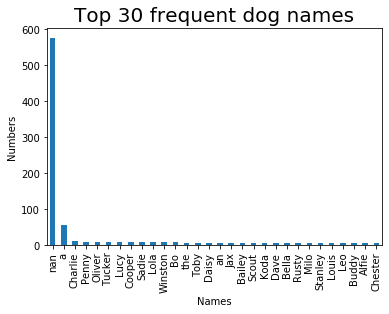

In [302]:
#Check most frequent dogs names
plt.title('Top 30 frequent dog names', size=20)
plt.xlabel('Names')
plt.ylabel('Numbers')
plt.savefig('frequent_dogs_names');

archive_clean['name'].value_counts()[0:30].sort_values(ascending=False).plot(kind = 'bar')

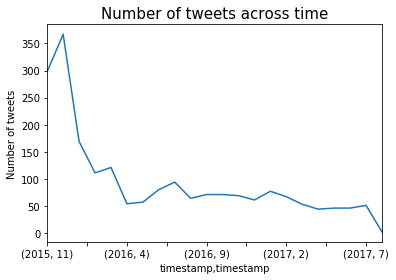

In [317]:
#visualize tweet count trend 
plt.title('Number of tweets across time', size=15)
plt.xlabel('Time (Year, Month)')
plt.ylabel('Number of tweets')
plt.savefig('tweets_over_time');

archive_clean['tweet_id'].groupby([archive_clean['timestamp'].dt.year, archive_clean['timestamp'].dt.month]).count().plot(kind='line')

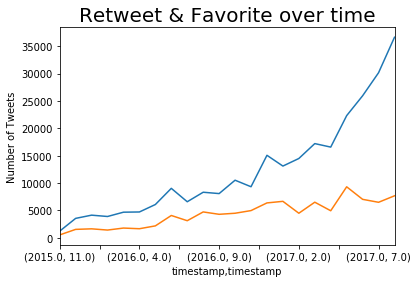

In [311]:
#visualize retweet & favorite count over time
plt.title('Retweet & Favorite over time', size =20)
plt.ylabel('Number of Tweets')
plt.xlabel('Time (Year,Month)')
#plt.legend('Retweet Count', 'Favorite Count')
plt.savefig('Retweet_Favorite')

tweets_clean.favorite_count.groupby([archive_clean['timestamp'].dt.year, archive_clean['timestamp'].dt.month]).mean().plot(kind='line')
tweets_clean.retweet_count.groupby([archive_clean['timestamp'].dt.year, archive_clean['timestamp'].dt.month]).mean().plot(kind='line')


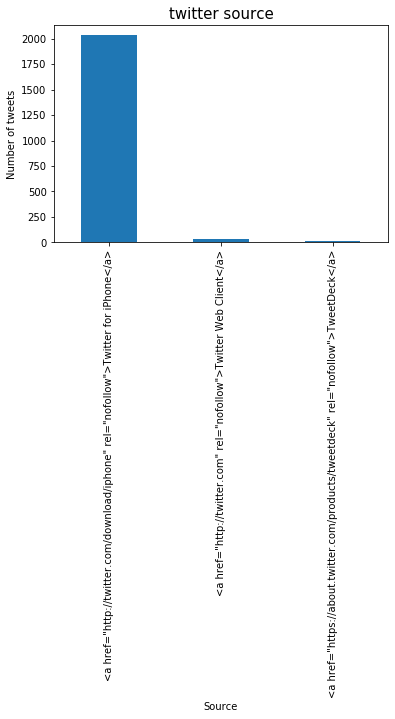

In [323]:
#visualize source trend
plt.title('twitter source', size=15)
plt.xlabel('Source')
plt.ylabel('Number of tweets')
plt.savefig('tweets_source')
archive_clean['source'].value_counts().plot(kind='bar')

In [324]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                  2075 non-null object
jpg_url                   2075 non-null object
img_num                   2075 non-null int64
prediction1               2075 non-null object
prediction1_confidence    2075 non-null float64
p1_dog                    2075 non-null bool
prediction1               2075 non-null object
prediction2_confidence    2075 non-null float64
p2_dog                    2075 non-null bool
prediction3               2075 non-null object
prediction3_confidence    2075 non-null float64
p3_dog                    2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


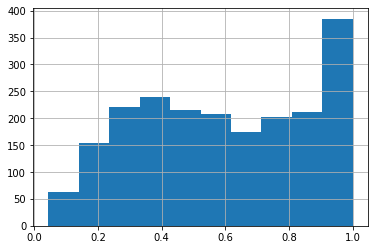

In [327]:
#checking prediction1_confidence
image_clean.prediction1_confidence.hist()

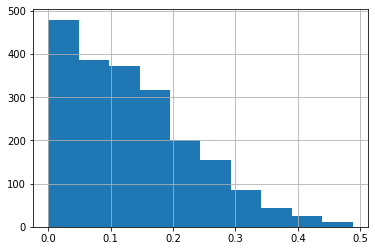

In [328]:
image_clean.prediction2_confidence.hist()

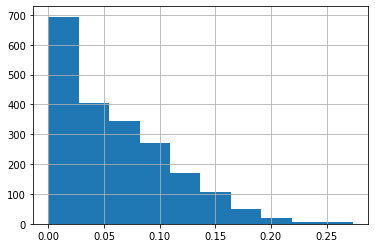

In [329]:
#checking prediction3_confidence
image_clean.prediction3_confidence.hist()